# Discrete Fourier Transform

The discrete Fourier Transform (DFT) consists in applying an Fourier transform (FT) to a serie of number $x_{n}$ instead of a continuous signal $x(t)$. This relies on rectangle approximation of function integration. This notebook proposes to remain the basic definitions of usual Fourier transforms and naturally introduce the DSF. An example is then given using different implementation of the FT.

## Basic definitions

### Fourier transform of a continuous signal

A signal $x(t)$ can be decomposed as a infinite sum of periodic functions $e^{i\omega}t$. The weight of each of these function, $X(\omega)$, is called the fourier transform of $x(t)$. The inverse transformation is also possible and represents a way to determine $X(\omega)$ knowing $x(t)$:
\begin{equation}
x(t) = \int^{+\infty}_{-\infty} X(\omega) \, e^{i\omega t}\text{d}\omega ~~~\text{and}~~~ X(\omega) = \int^{-\infty}_{-\infty} x(t) \, e^{-i\omega t}\text{d}t
\end{equation}

The auto-correlation function $R(\tau)$ of a signal $x(t)$ probes how a change of $x(t_0)$ can impact $x(t_0+\tau)$. It is a way to assess the memory time of the signal, or its temporal correlation. It is defined as:
\begin{equation}
 R(\tau) \equiv \int^{+\infty}_{-\infty} x(t)x(t-\tau)\text{d}\tau
\end{equation}

### Discrete fourier transform

We know that integral of function can be approximated by a Riemann sum. The sampling time is called $T_s$ and the number of considered point is $N$.
\begin{eqnarray}
X(\omega) &=& \int^{-\infty}_{-\infty} x(t) \, e^{-i\omega t}\text{d}t \\
    &\approx& \sum^{N-1}_{n=0} \; x(nT_{s}) \: e^{-i\omega \, n T_{s}} \: T_{s}
\end{eqnarray}

By introducing the sampling frequency $\omega_{s} \equiv 2\pi/T_{s}$, and the discrete frequency values ${\omega_{k}} = {k \frac{\omega_{s}}{N}}$, we can reformulate things as:
\begin{equation}
 X(\omega_{k}) \equiv X_{k} \; = \; T_{s} \; \sum^{N-1}_{n=0} \; x(nT_{s}) \: e^{-i \frac{kn}{N} }
\end{equation}

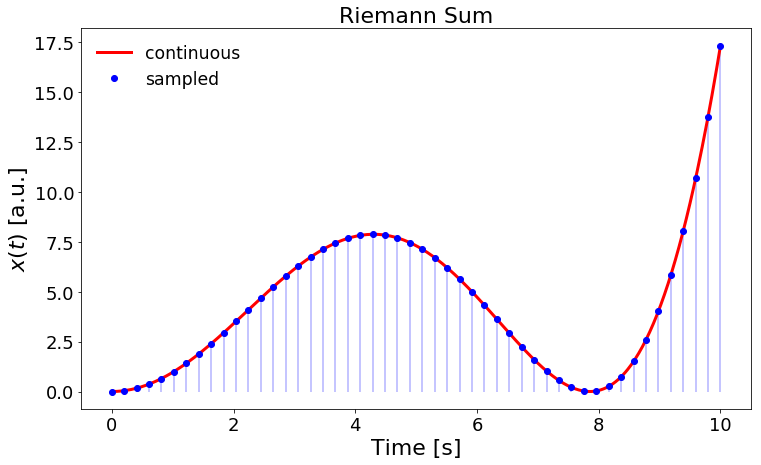

In [183]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

def signal(t):
    return t**2 *np.cos(0.2*t )**2

T  = np.linspace(0,10,500)
Ts = np.linspace(0,10,50)
plt.figure(figsize=(12,7))
plt.title('Riemann Sum', fontsize=22)
plt.xlabel('Time [s]', fontsize=22)
plt.ylabel('$x(t)$ [a.u.]', fontsize=22)
plt.xticks(fontsize=18); plt.yticks(fontsize=18)
plt.plot(T ,signal(T) ,'r-', linewidth='3', label='continuous')
plt.plot(Ts,signal(Ts),'bo', label='sampled')
for t in Ts: plt.vlines(t,  0, signal(t), color='blue', alpha=0.3 )
plt.legend(frameon=False,fontsize='xx-large' ,loc='best')

In [133]:
# Define a signal including periodic component, noise and an enveloppe
Npx      = 10000
dT       = 200
time     = np.linspace(-dT/2,dT/2,Npx)
x_period = np.cos(3*2*np.pi*time)
x_noise  = np.random.uniform(0,0.2,Npx)
x_envlop = np.exp( - (np.abs(time)/2)**2 ) + 0.3*np.exp( - (np.abs(time-5)/2)**2 ) \
    + 0.3* np.exp( - (np.abs(time+5)/2)**2 )

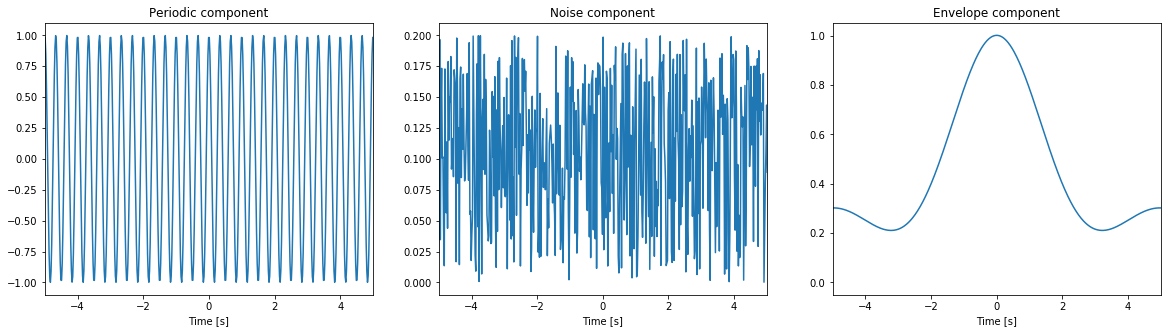

In [134]:
# Plot each signal component
plt.figure(figsize=(20,5))
plt.subplot(131)
plt.title('Periodic component')
plt.xlabel('Time [s]')
plt.xlim(-5,5)
plt.plot(time,x_period)
plt.subplot(132)
plt.title('Noise component')
plt.xlabel('Time [s]')
plt.xlim(-5,5)
plt.plot(time,x_noise)
plt.subplot(133)
plt.title('Envelope component')
plt.xlabel('Time [s]')
plt.xlim(-5,5)
plt.plot(time,x_envlop)
plt.show()

In [135]:
# Define the full signal and it's auto-correlation function
signal   = (x_period+x_noise) * x_envlop
autocorr = np.correlate(signal,signal,'same')

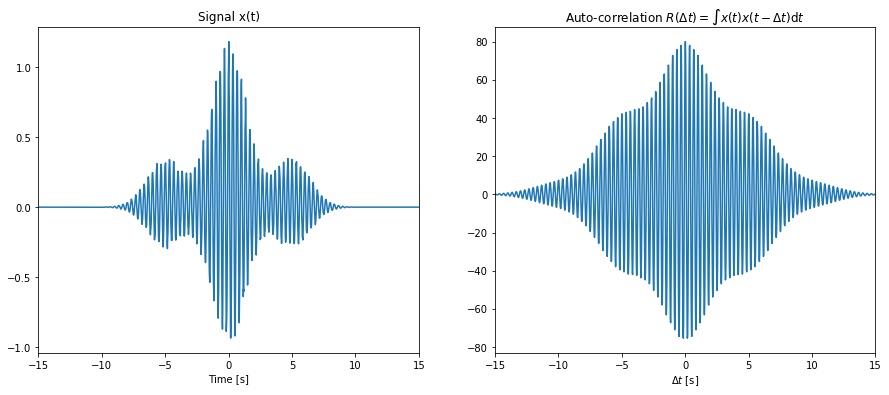

In [140]:
# Plot them
plt.figure(figsize=(15,6))
plt.subplot(121)
plt.title('Signal x(t)')
plt.xlabel('Time [s]')
plt.xlim(-15,15)
plt.plot(time,signal)
plt.subplot(122)
plt.title('Auto-correlation $R(\Delta t) = \int x(t)x(t-\Delta t)\mathrm{d}t$')
plt.xlabel('$\Delta t$ [s]')
plt.xlim(-15,15)
plt.plot(time,autocorr)
plt.show()

In [137]:
# Compute the FFT of x(t) and R(tau)
import scipy.fftpack as ft
x_rfft          = ft.rfft(signal)
Corr_rfft       = ft.rfft(autocorr)
rfreq           = ft.rfftfreq(signal.size, d=time[1]-time[0])
x_rfft_norm     = x_rfft    / np.sqrt( len(x_rfft) )
Corr_rfft_norm  = Corr_rfft / np.sqrt(len(Corr_rfft))

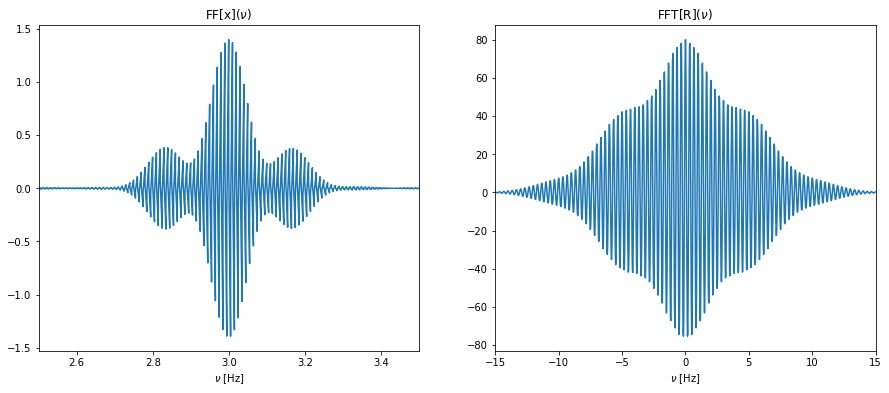

In [141]:
# Plot these two functions
plt.figure(figsize=(15,6))
plt.subplot(121)
plt.title('FF[x]($\\nu$)')
plt.xlabel('$\\nu$ [Hz]')
plt.xlim(2.5,3.5)
plt.plot(rfreq,x_rfft_norm)
plt.subplot(122)
plt.title('FFT[R]($\\nu$)')
plt.xlabel('$\\nu$ [Hz]')
plt.xlim(-15,15)
plt.plot(time,autocorr)
plt.show()